## Context
The dataset provided is from the city of New York and contains the different attributes of the properties there and the locations in which they are located. The aim is to perform a detailed analysis of this dataset and provide useful insights to facilitate the process of buying and selling real estate.

## Data Description:

The detailed data dictionary is given below:

* BROKERTITLE - (Dont Need)
* TYPE - Type of the property like
    * Condo for sale
    * House for sale
    * Townhouse for sale
    * Multi-family home for sale
* PRICE
* BEDS - Number of bedrooms in the property
* BATH - Number of bathrooms in the property
* PROPERTYSQFT
* ADDRESS (Dont Need)
* STATE - City, State and Zipcode (Dont Need)
* MAIN_ADDRESS (Dont Need)
* ADMINISTRATIVE_AREA_LEVEL_2 (Dont Need)
* LOCALITY (Don't Need)
* SUBLOCALITY
* STREET_NAME (Dont Need)
* LONG_NAME (Dont Need)
* FORMATTED_ADDRESS (Dont Need)
* LATITUDE (Don't need)
* LONGITUDE (Don't need)


### 4.1 Sanity Checks

**Importing necessary libraries**

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# For randomized data splitting
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [2]:
# let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing the dataset**

In [3]:
data = pd.read_csv('/content/drive/MyDrive/NY-House-Dataset.csv')

**Remove columns we don't need**

In [4]:
columns_not_needed = ['BROKERTITLE', 'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY', 'STREET_NAME', 'LONG_NAME', 'FORMATTED_ADDRESS', 'LONGITUDE', 'LATITUDE']
data = data.drop(columns=columns_not_needed)

**View the first and last 5 rows of the dataset**

In [5]:
data.head()

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY
0,Condo for sale,315000,2,2.00,1400.00,Manhattan
1,Condo for sale,195000000,7,10.00,17545.00,New York County
2,House for sale,260000,4,2.00,2015.00,Richmond County
3,Condo for sale,69000,3,1.00,445.00,New York County
4,Townhouse for sale,55000000,7,2.37,14175.00,New York County


In [6]:
data.tail()

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY
4796,Co-op for sale,599000,1,1.00,2184.21,New York
4797,Co-op for sale,245000,1,1.00,2184.21,Queens County
4798,Co-op for sale,1275000,1,1.00,2184.21,New York County
4799,Condo for sale,598125,2,1.00,655.00,Queens
4800,Co-op for sale,349000,1,1.00,750.00,Brooklyn


**Understand the shape of the dataset**

In [7]:
# checking shape of the data
print("There are", data.shape[0], 'rows and', data.shape[1], "columns.")

There are 4801 rows and 6 columns.


**Check the data types of the columns for the dataset**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TYPE          4801 non-null   object 
 1   PRICE         4801 non-null   int64  
 2   BEDS          4801 non-null   int64  
 3   BATH          4801 non-null   float64
 4   PROPERTYSQFT  4801 non-null   float64
 5   SUBLOCALITY   4801 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 225.2+ KB


* There are 6 numerical columns in the data and 2 object type columns.
* Baths column is likely a float because of 1/2 or 3/4 type baths.  May need to transform that field.


In [9]:
# let's get the unique values for the type field
data['TYPE'].unique()

array(['Condo for sale', 'House for sale', 'Townhouse for sale',
       'Co-op for sale', 'Multi-family home for sale', 'For sale',
       'Contingent', 'Land for sale', 'Foreclosure', 'Pending',
       'Coming Soon', 'Mobile house for sale', 'Condop for sale'],
      dtype=object)

In [10]:
#Check for any missing values in the type field
data['TYPE'].isnull().sum()

0

* Let's find the count of each type in the that field

In [11]:
# checking the count of different data types in BuildingArea column
data['TYPE'].value_counts()

TYPE
Co-op for sale                1450
House for sale                1012
Condo for sale                 891
Multi-family home for sale     727
Townhouse for sale             299
Pending                        243
Contingent                      88
Land for sale                   49
For sale                        20
Foreclosure                     14
Condop for sale                  5
Coming Soon                      2
Mobile house for sale            1
Name: count, dtype: int64

* We can see that there are likely some spelling and miscategorization of values.  We may want to clean this up.
* Let's fix types and set status TYPE values to NA


In [13]:
# fixing incorrect categories
data['TYPE'] = data['TYPE'].replace(['Condo for sale'],'Condo')
data['TYPE'] = data['TYPE'].replace(['Condop for sale'],'Condo')
data['TYPE'] = data['TYPE'].replace(['Co-op for sale'],'Coop')
data['TYPE'] = data['TYPE'].replace(['Multi-family home for sale'],'Multi-family')
data['TYPE'] = data['TYPE'].replace(['Townhouse for sale'],'Townhouse')
data['TYPE'] = data['TYPE'].replace(['Mobile house for sale'],'Mobile')
data['TYPE'] = data['TYPE'].replace(['Land for sale'],'Land')
data['TYPE'] = data['TYPE'].replace(['House for sale'],'House')


# replacing status values with na
data['TYPE'] = data['TYPE'].replace(['Pending','Contingent', 'For sale', 'Foreclosure', 'Coming Soon'], 'NA')

In [14]:
# let's check the TYPE column again
data['TYPE'].value_counts()

TYPE
Coop            1450
House           1012
Condo            896
Multi-family     727
NA               367
Townhouse        299
Land              49
Mobile             1
Name: count, dtype: int64

In [15]:
#Remove the rows with NA and Mobile
data = data[data["TYPE"] != 'NA']
data = data[data["TYPE"] != 'Mobile']

**What are missing values?**

Missing values occur when no data value is stored for the variable in an observation. Missing data are a common occurrence and can have a significant effect on the conclusions that can be drawn from the data.

**Checking for missing values in the data**

In [16]:
data.isnull().sum()

TYPE            0
PRICE           0
BEDS            0
BATH            0
PROPERTYSQFT    0
SUBLOCALITY     0
dtype: int64

* There are no missing values in the columns of the data.


**Checking for duplicate entries in the data**

In [17]:
data.duplicated().sum()

347

* There are duplicate entries in the data. Let's remove them.

In [18]:
# dropping duplicate entries from the data
data.drop_duplicates(inplace=True)

# resetting the index of data frame since some rows will be removed
data.reset_index(drop=True,inplace=True)

**Let's check the statistical summary of the data.**

In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PRICE,4086.00,2535747.32,33966671.67,5800.00,499999.00,849000.00,1571250.00,2147483647.00
BEDS,4086.00,3.42,2.71,1.00,2.00,3.00,4.00,50.00
BATH,4086.00,2.42,2.03,0.00,1.00,2.00,3.00,50.00
PROPERTYSQFT,4086.00,2191.68,2386.41,250.00,1168.75,2184.21,2184.21,65535.00


* `Bedrooms:` On average there are 3 bedrooms in a property. 75% of the properties have less than or equal to 4 bedrooms. There are some properties which have 50 bedrooms.  50 may be an outlier or bad data
* `Baths:` On average there are 2 bathrooms in a property. 75% of the properties have less than or equal to 3 bathrooms. There are some properties which have 50 bathrooms. 50 may be an outlier or bad data
* `Property Sq Feet`: The square feet column has a huge standard deviation +2000 with a mean and median size of 2177 and 2184 sq feet respectively. Also, there is a huge difference between the maximum value and the 75% percentile of the data which indicates there might be outliers present in this column.
* `Price`: On average the house prices are 2,381,171. The median price is 825,000. There is a huge difference between the maximum value and the 75% percentile of the data which indicates there might be outliers present in this column.

In [21]:
# let's check the Sublocality column
data['SUBLOCALITY'].value_counts()

SUBLOCALITY
New York            837
Kings County        636
Queens County       588
Queens              465
Brooklyn            404
Richmond County     366
Bronx County        283
New York County     257
The Bronx           166
Staten Island        46
Manhattan            21
Flushing              4
Coney Island          3
Riverdale             3
East Bronx            1
Brooklyn Heights      1
Jackson Heights       1
Rego Park             1
Fort Hamilton         1
Dumbo                 1
Snyder Avenue         1
Name: count, dtype: int64

In [22]:
#Remove the rows with less than 5 sold in the Sublocality
data = data[data.groupby("SUBLOCALITY")["SUBLOCALITY"].transform("size") > 4]


### 4.2 Univariate Analysis

**Let's check the distribution for numerical columns.**

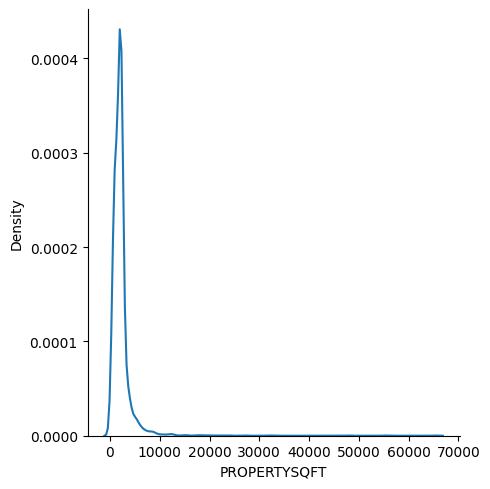

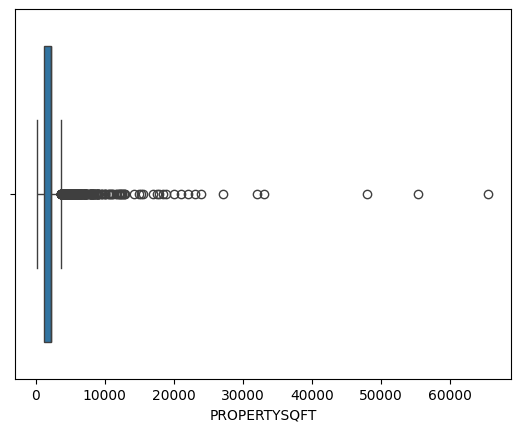

In [24]:
sns.displot(data=data,x='PROPERTYSQFT',kind='kde')
plt.show()
sns.boxplot(data=data,x='PROPERTYSQFT')
plt.show()

* The distribution of Property Square feet is right skewed.
* It has many outliers. There are values above 10000 sq feet which seems high.
* Plot only the values that are less than 10000 sq feet.

In [25]:
#How many observations have a square footage of less than 3000
cleaned_data = data.loc[data['PROPERTYSQFT'] < 3000 ]
cleaned_data.value_counts().sum()


3538

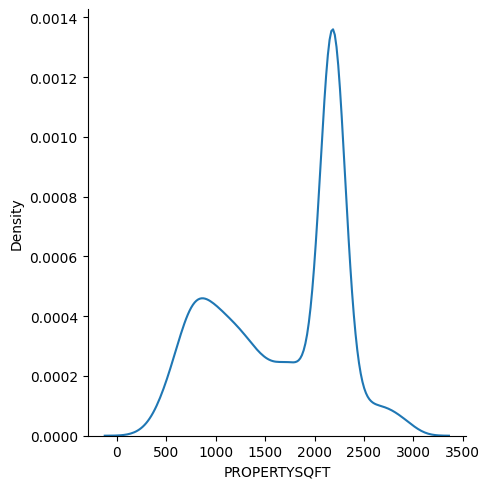

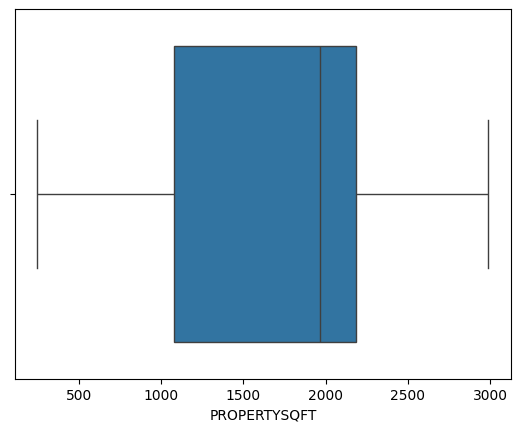

In [26]:
# Plot again
sns.displot(data=cleaned_data,x='PROPERTYSQFT', kind='kde')
plt.show()
sns.boxplot(data=cleaned_data,x='PROPERTYSQFT')
plt.show()

**Observations on Price**

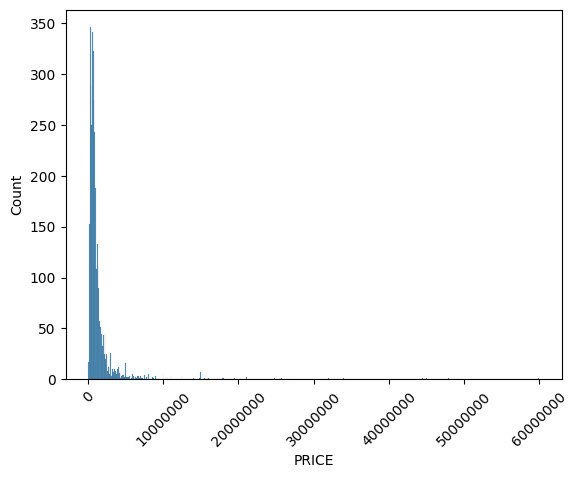

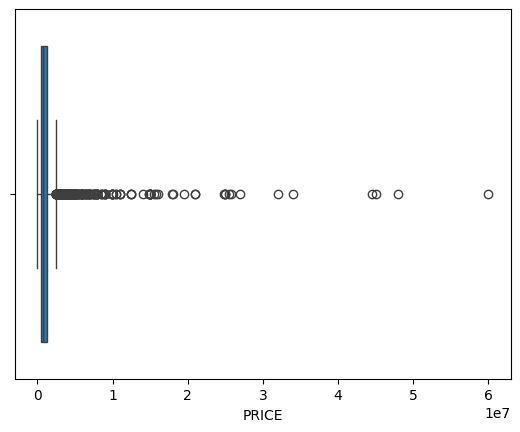

In [27]:
sns.histplot(data=cleaned_data,x='PRICE')

plt.ticklabel_format(useOffset=False)
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
plt.show()
sns.boxplot(data=cleaned_data,x='PRICE')

plt.show()

In [28]:
#How many observations have a price of less than 1,500,000 which is at the 75% and are greater than 499000 which is the 25%
#new_data = data.loc[(data['PRICE'] > 199000) & (data['PRICE'] < 20000000)]
#new_data = data.loc[data['PRICE'] > 20000000]
cleaned_data = cleaned_data.loc[data['PRICE'] < 1000000]
#new_data = data.loc[data['PRICE'] > 20000000]
cleaned_data.value_counts().sum()

2406

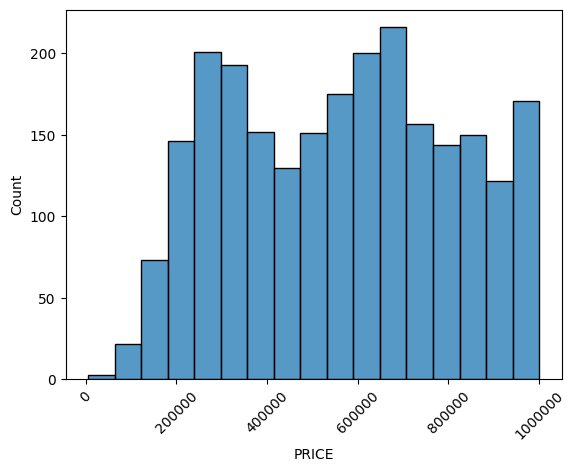

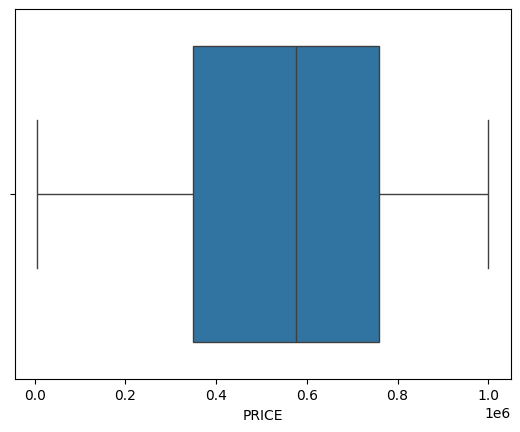

In [29]:
sns.histplot(data=cleaned_data,x='PRICE')

plt.ticklabel_format(useOffset=False)
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
plt.show()
sns.boxplot(data=cleaned_data,x='PRICE')

plt.show()

**Observations on Rooms**


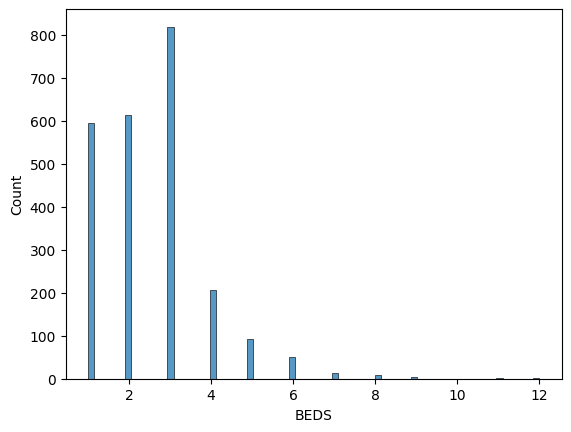

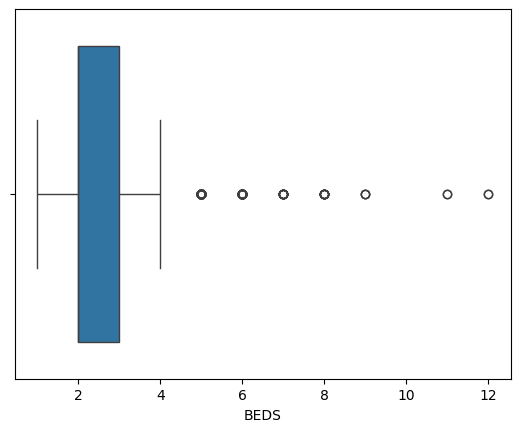

In [31]:
sns.histplot(data=cleaned_data,x='BEDS')

plt.ticklabel_format(useOffset=False)
plt.show()
sns.boxplot(data=cleaned_data,x='BEDS')
plt.show()

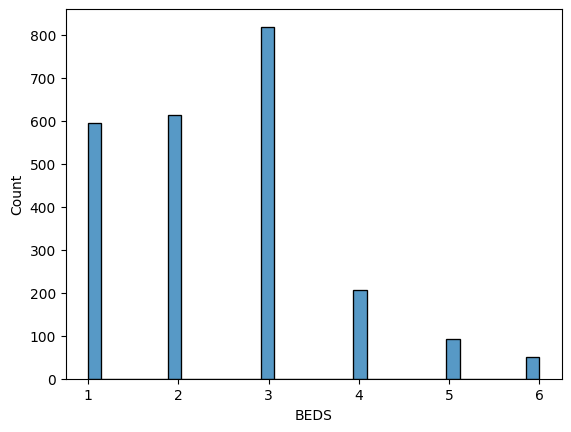

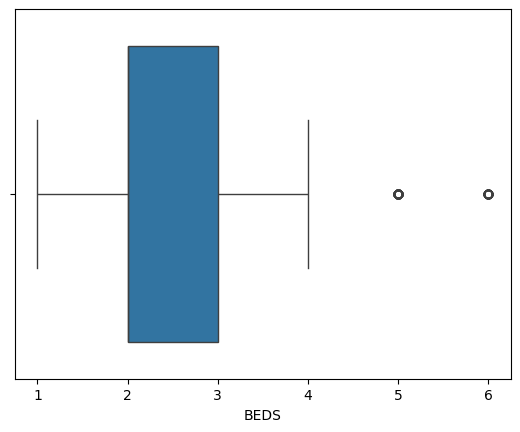

In [32]:
cleaned_data = cleaned_data.loc[data['BEDS'] < 7]

sns.histplot(data=cleaned_data,x='BEDS')

plt.ticklabel_format(useOffset=False)
plt.show()

sns.boxplot(data=cleaned_data,x='BEDS')
plt.show()

**Observation on Baths**

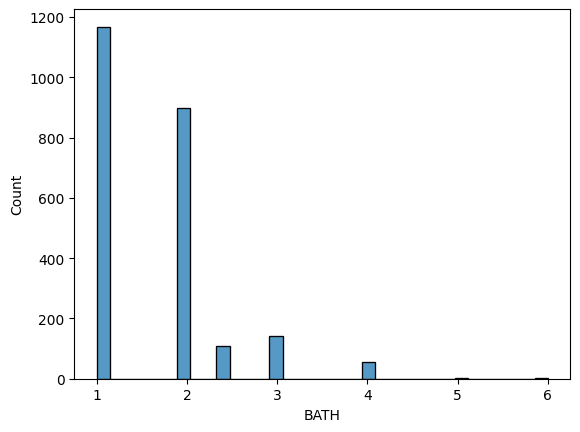

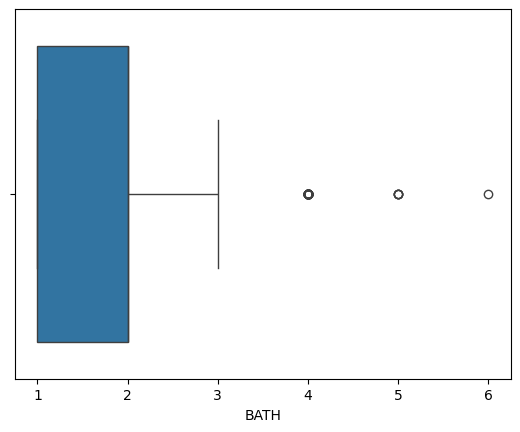

In [33]:

sns.histplot(data=cleaned_data,x='BATH')

plt.ticklabel_format(useOffset=False)
plt.show()
sns.boxplot(data=cleaned_data,x='BATH')
plt.show()

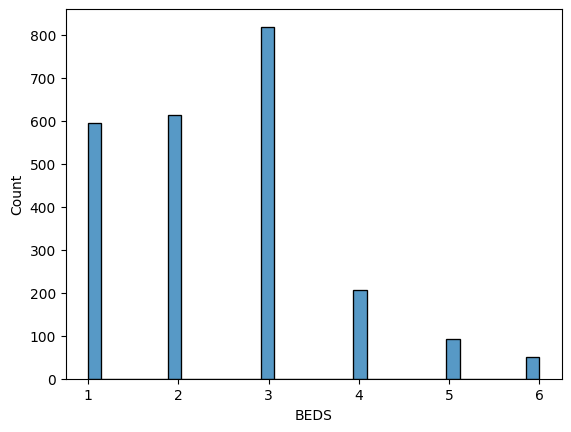

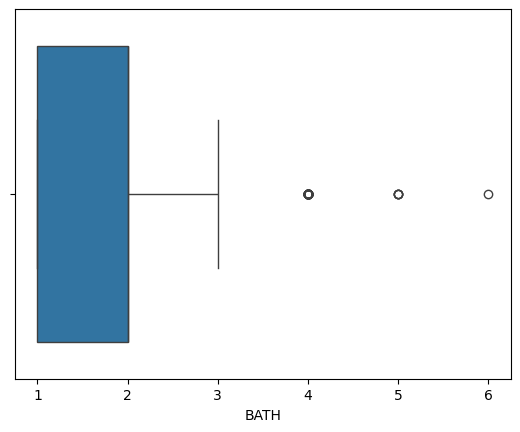

In [35]:
cleaned_data = cleaned_data.loc[data['BATH'] < 7]

sns.histplot(data=cleaned_data,x='BEDS')

plt.ticklabel_format(useOffset=False)
plt.show()

sns.boxplot(data=cleaned_data,x='BATH')
plt.show()

**Observations on Property Type**

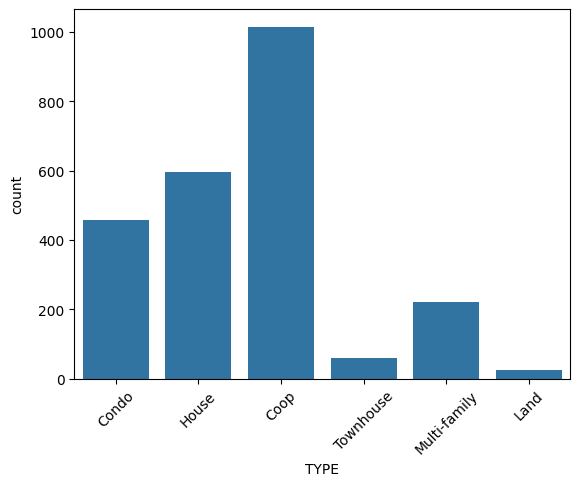

In [36]:
sns.countplot(data=cleaned_data,x='TYPE')
plt.xticks(rotation=45)
plt.show()

**Observation of Sublocality**

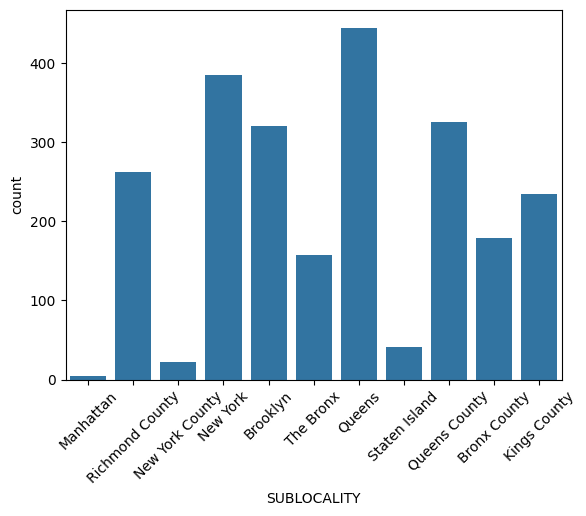

In [37]:
sns.countplot(data=cleaned_data,x='SUBLOCALITY')
plt.xticks(rotation=45)
plt.show()

### 4.3 Bivariate Analysis

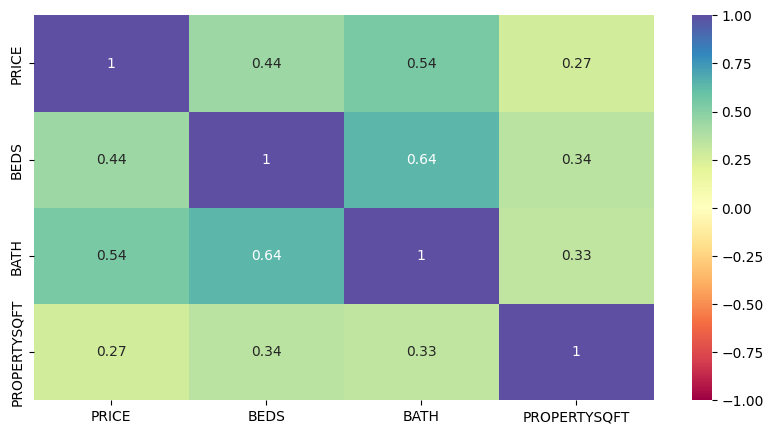

In [38]:
#create data frame with only numeric data
numeric_data = cleaned_data.select_dtypes(include=["number"])

plt.figure(figsize=(10,5))
sns.heatmap(numeric_data.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

**Observations**
* Price column does not show a high correlation with number of bedrooms, bathrooms or square footage.
* Bedrooms, Bathrooms and square footage show a high correlation with each other which is expected.


**Properties which have more space for living or more number of rooms, bedrooms and bathrooms generally tend to have higher selling prices. Let's analyze the relationship between the price and total number of rooms in a property**

In [39]:
# let's create a column with a sum of number of rooms, bedrooms, bathrooms, and car parking spaces
cleaned_data['TOTAL_ROOMS'] = cleaned_data['BEDS'] + cleaned_data['BATH']
cleaned_data.head()


,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY,TOTAL_ROOMS
0,Condo,315000,2,2.00,1400.00,Manhattan,4.00
2,House,260000,4,2.00,2015.00,Richmond County,6.00
3,Condo,69000,3,1.00,445.00,New York County,4.00
6,Condo,899500,2,2.00,2184.21,New York,4.00
9,Coop,440000,2,1.00,978.00,Brooklyn,3.00


* The column has been successfully added in the data frame.

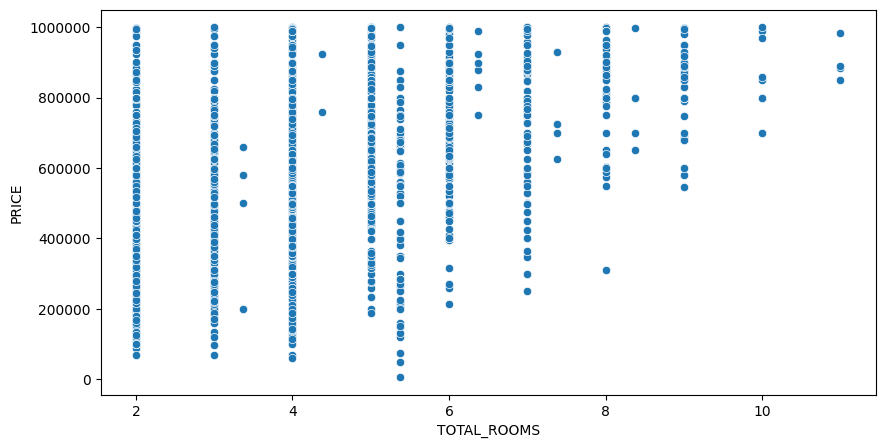

In [40]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=cleaned_data,x='TOTAL_ROOMS',y='PRICE')
plt.ticklabel_format(style='plain')
plt.show()

* We can see an increasing trend of selling price with total space. Let's visualize the trend using lmplot().

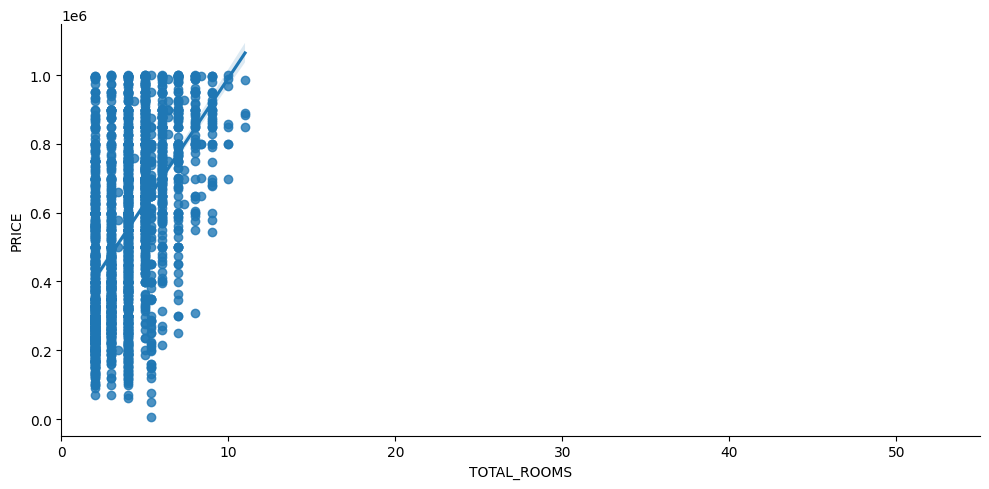

In [41]:
sns.lmplot(data=cleaned_data,x='TOTAL_ROOMS',y='PRICE',height=5,aspect=2)
plt.xlim(0,55)
plt.show()

* A positive correlation or an increasing trend can be clearly observed between the total number of rooms and the selling price of the property, although the line plotted by lmlot() doesn't show a high correlation. Let's check the correlation value further.
* The positive correlation indicates that more living space implies a higher selling price.

In [42]:
# lets check the correlation between Total space and Price
cleaned_data[['TOTAL_ROOMS','PRICE']].corr()

,TOTAL_ROOMS,PRICE
TOTAL_ROOMS,1.00,0.52
PRICE,0.52,1.00


* As expected, there is a positive correlation between Total Space and Price.

**The price of properties vary based on the type of the property. For example, a villa may be priced higher than a duplex because of more amenities. Let's see which type of property is priced higher.**

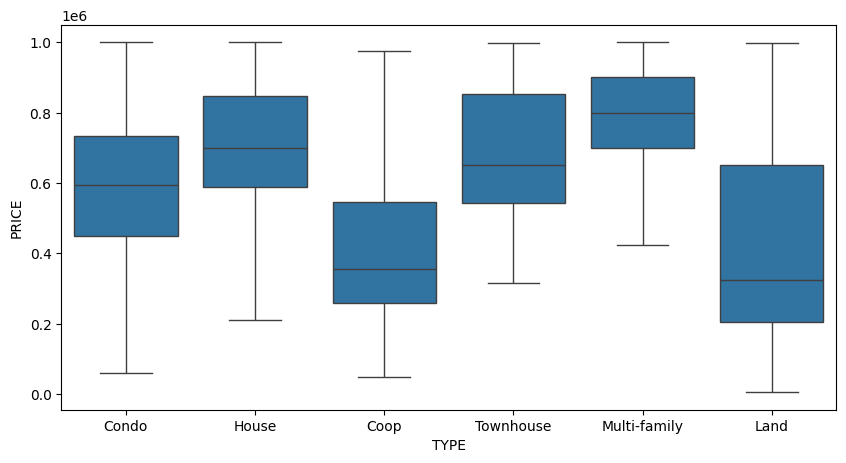

In [43]:
plt.figure(figsize=(10,5))
sns.boxplot(data=cleaned_data,x='TYPE',y='PRICE',showfliers=False) # turning off outliers

plt.show()

* The properties like villa, cottage, etc have a higher median price as compared to a townhouse and a duplex.
* The townhouses have a higher median price than unit, duplex properties.
* Customers planning to buy 'h' type property might have to invest more.

**Similarly the region of the property will play an integral role in deciding the selling price. Let' do a similar analysis with regions as well**

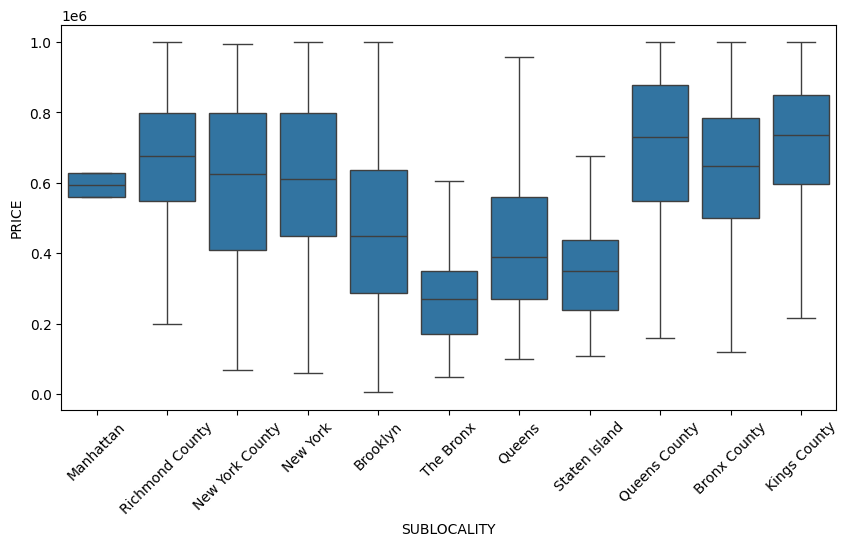

In [44]:
plt.figure(figsize=(10,5))
sns.boxplot(data=cleaned_data,x='SUBLOCALITY',y='PRICE',showfliers=False) # turning off outliers
plt.xticks(rotation=45)
plt.show()

* The Bronx, Staten Island and Queens have the lowest prices.

In [45]:
# checking the average number of bedrooms, bathrooms, and car parking spaces in a region
cleaned_data.groupby(['SUBLOCALITY','TYPE'])[['BEDS','BATH','PROPERTYSQFT', 'PRICE']].mean()

BEDS  BATH  PROPERTYSQFT     PRICE
SUBLOCALITY     TYPE                                            
Bronx County    Condo         1.88  1.67        890.75 324736.00
                Coop          2.00  1.36       1033.80 257278.57
                House         3.28  2.08       1690.40 607759.26
                Land          3.00  2.37       2184.21 380600.00
                Multi-family  4.77  2.60       2108.24 781782.83
                Townhouse     3.20  2.42       1736.24 695000.00
Brooklyn        Condo         2.04  1.48        996.20 632140.53
                Coop          1.68  1.11       1117.11 392682.46
                House         3.33  2.33       2216.14 733333.33
                Land          3.00  2.37       2184.21   5800.00
                Townhouse     2.00  1.50       1515.10 597500.00
Kings County    Condo         2.15  1.67       1250.28 593153.85
                Coop          2.00  1.31       1486.62 438076.92
                House         3.18  2.07       1675.72 708557.98
                Land          3.00  2.37       2184.21 512571.29
                Multi-family  4.22  2.67       2046.74 794785.91
                Townhouse     3.82  1.94       1982.26 799544.09
Manhattan       Condo         1.33  1.33       1421.07 608000.00
                Coop          1.00  1.00       2184.21 612000.00
New York        Condo         2.03  1.29       1036.17 695835.32
                Coop          1.89  1.18       1674.16 595372.95
                House         2.67  1.76       1373.97 755845.80
                Land          3.00  2.37       2184.21 137000.00
                Multi-family  3.83  2.33       1575.03 745000.00
New York County Condo         2.38  1.42       1140.43 581625.00
                Coop          1.58  1.25       1711.62 604625.00
                Multi-family  3.00  2.37       2500.00 950000.00
                Townhouse     4.00  2.00       1440.00 795000.00
Queens          Condo         1.97  1.58       1242.24 609335.58
                Coop          1.82  1.23       1610.83 352430.81
                House         4.00  2.00       1400.00 899000.00
Queens County   Condo         1.85  1.67       1424.16 596434.15
                Coop          1.80  1.09       1805.36 330988.57
                House         3.28  2.12       1890.81 744086.65
                Land          3.00  2.30       1937.37 576800.00
                Multi-family  4.44  2.64       2074.88 798938.04
                Townhouse     2.86  2.00       1694.13 838071.43
Richmond County Condo         2.00  1.85       1196.36 467263.64
                House         3.16  2.10       1515.51 672799.33
                Land          3.00  2.37       2184.21 336983.33
                Multi-family  3.78  2.70       2064.89 800733.33
                Townhouse     2.64  2.09       1488.93 544042.48
Staten Island   Condo         1.74  1.29        955.13 371430.43
                Coop          1.60  1.00        944.80 311900.00
                Townhouse     3.00  2.00       1677.00 549999.00
The Bronx       Condo         2.11  1.56       1102.77 394698.07
                Coop          1.71  1.19       1174.45 262961.57
                House         3.00  2.00       1728.00 638000.00
                Townhouse     4.00  3.00       2160.00 588000.00

* We have received the mean number of Bedrooms, Bathrooms, and Car parking spaces for each type of property in a specific region.

**RUN A LINEAR REGRESSION MODEL**

First split the data






In [46]:
# drop_first=True will drop one of the three origin columns
cleaned_data = pd.get_dummies(cleaned_data, columns=["TYPE"], drop_first=False, dtype='float')
cleaned_data.head()

,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY,TOTAL_ROOMS,TYPE_Condo,TYPE_Coop,TYPE_House,TYPE_Land,TYPE_Multi-family,TYPE_Townhouse
0,315000,2,2.00,1400.00,Manhattan,4.00,1.00,0.00,0.00,0.00,0.00,0.00
2,260000,4,2.00,2015.00,Richmond County,6.00,0.00,0.00,1.00,0.00,0.00,0.00
3,69000,3,1.00,445.00,New York County,4.00,1.00,0.00,0.00,0.00,0.00,0.00
6,899500,2,2.00,2184.21,New York,4.00,1.00,0.00,0.00,0.00,0.00,0.00
9,440000,2,1.00,978.00,Brooklyn,3.00,0.00,1.00,0.00,0.00,0.00,0.00


In [47]:
# drop_first=True will drop one of the three origin columns
cleaned_data = pd.get_dummies(cleaned_data, columns=["SUBLOCALITY"], drop_first=False, dtype='float')
cleaned_data.head()

,PRICE,BEDS,BATH,PROPERTYSQFT,TOTAL_ROOMS,TYPE_Condo,TYPE_Coop,TYPE_House,TYPE_Land,TYPE_Multi-family,...,SUBLOCALITY_Brooklyn,SUBLOCALITY_Kings County,SUBLOCALITY_Manhattan,SUBLOCALITY_New York,SUBLOCALITY_New York County,SUBLOCALITY_Queens,SUBLOCALITY_Queens County,SUBLOCALITY_Richmond County,SUBLOCALITY_Staten Island,SUBLOCALITY_The Bronx
0,315000,2,2.00,1400.00,4.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,260000,4,2.00,2015.00,6.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
3,69000,3,1.00,445.00,4.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
6,899500,2,2.00,2184.21,4.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
9,440000,2,1.00,978.00,3.00,0.00,1.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [48]:
# independent variables
X = cleaned_data.drop(["PRICE"], axis=1)
# dependent variable
y = cleaned_data[["PRICE"]]

In [49]:
# let's add the intercept to data
X = sm.add_constant(X)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

In [51]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 1663
Number of rows in test data = 714


In [52]:
#Function for printing out prediction results
def printPredictionReport(testData, predictionData):
  size = predictionData.size
  count = 0

  while count < size:
    print()
    print("For the following test values: ")
    print(f"Beds: {testData.iloc[count]['BEDS']:.1f}")
    print(f"Baths: {testData.iloc[count]['BATH']:.1f}")
    print(f"Square Footage: {testData.iloc[count]['PROPERTYSQFT']:.1f}")

    #Determine home type
    if testData.iloc[count]['TYPE_Condo'] > 0:
      print(f"Home Type: Condo")
    if testData.iloc[count]['TYPE_House'] > 0:
      print(f"Home Type: Single family home")
    if testData.iloc[count]['TYPE_Land'] > 0:
      print(f"Home Type: Land")
    if testData.iloc[count]['TYPE_Multi-family'] > 0:
      print(f"Home Type: Multi-family home")
    if testData.iloc[count]['TYPE_Townhouse'] > 0:
      print(f"Home Type: Townhouse")

    #Determine sublocality
    if testData.iloc[count]['SUBLOCALITY_Brooklyn'] > 0:
      print("Location: Brooklyn")
    if testData.iloc[count]['SUBLOCALITY_Kings County'] > 0:
      print("Location: Kings County")
    if testData.iloc[count]['SUBLOCALITY_Manhattan'] > 0:
      print("Location: Manhattan")
    if testData.iloc[count]['SUBLOCALITY_New York'] > 0:
      print("Location: New York")
    if testData.iloc[count]['SUBLOCALITY_New York County'] > 0:
      print("Location: New York County")
    if testData.iloc[count]['SUBLOCALITY_Queens'] > 0:
      print("Location: Queens")
    if testData.iloc[count]['SUBLOCALITY_Queens County'] > 0:
      print("Location: Queens County")
    if testData.iloc[count]['SUBLOCALITY_Richmond County'] > 0:
      print("Location: Richmond County")
    if testData.iloc[count]['SUBLOCALITY_Staten Island'] > 0:
      print("Location: Staten Island")
    if testData.iloc[count]['SUBLOCALITY_The Bronx'] > 0:
      print("Location: The Bronx")

    print(f"Beds: {testData.iloc[count]['BEDS']:.1f}")
    prediction = float(predictionData[count])
    print(f"The price prediction is: ${prediction:,.2f}")
    count += 1


In [53]:
#Function for creating a prediction results dataframe
def createPredictionReportTable(testData, predictionData):

  size = predictionData.size
  count = 0

  report_data = []

  columnValues = ["Predicted Price", "Beds", "Baths", "Square Footage", "Home Type", "Location"]

  while count < size:
    valueList = []
    prediction = predictionData[count]
    prediction = round(float(prediction), 2)
    valueList.append(prediction)
    beds = round(float(testData.iloc[count]['BEDS']), 2)
    valueList.append(beds)
    baths = round(float(testData.iloc[count]['BATH']), 2)
    valueList.append(baths)
    sqfoot = round(float(testData.iloc[count]['PROPERTYSQFT']), 1)
    valueList.append(sqfoot)

    #Determine home type
    home_type = ""
    if testData.iloc[count]['TYPE_Condo'] > 0:
      home_type = "Condo"
    if testData.iloc[count]['TYPE_Coop'] > 0:
      home_type = "Co-op"
    if testData.iloc[count]['TYPE_House'] > 0:
      home_type = "Single family home"
    if testData.iloc[count]['TYPE_Land'] > 0:
      home_type = "Land"
    if testData.iloc[count]['TYPE_Multi-family'] > 0:
      home_type = "Multi-family home"
    if testData.iloc[count]['TYPE_Townhouse'] > 0:
      home_type = "Townhouse"

    valueList.append(home_type)


    #Determine sublocality
    local = ""
    if testData.iloc[count]['SUBLOCALITY_Brooklyn'] > 0:
      local = "Brooklyn"
    if testData.iloc[count]['SUBLOCALITY_Kings County'] > 0:
      local = "Kings County"
    if testData.iloc[count]['SUBLOCALITY_Manhattan'] > 0:
      local = "Manhattan"
    if testData.iloc[count]['SUBLOCALITY_New York'] > 0:
      local = "New York"
    if testData.iloc[count]['SUBLOCALITY_New York County'] > 0:
      local = "New York County"
    if testData.iloc[count]['SUBLOCALITY_Queens'] > 0:
      local = "Queens"
    if testData.iloc[count]['SUBLOCALITY_Queens County'] > 0:
      local = "Queens County"
    if testData.iloc[count]['SUBLOCALITY_Richmond County'] > 0:
      local = "Richmond County"
    if testData.iloc[count]['SUBLOCALITY_Staten Island'] > 0:
      local = "Staten Island"
    if testData.iloc[count]['SUBLOCALITY_The Bronx'] > 0:
      local = "The Bronx"


    valueList.append(local)

    count += 1

    #append value list to data list
    report_data.append(valueList)


  df = pd.DataFrame(report_data)
  df.columns = columnValues

  print(df)
  return df

**Using the Scikit-learn Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming X contains the features and y contains the target variable (home prices)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

#printPredictionReport(X_test, y_pred)
createPredictionReportTable(X_test, y_pred)




It seems like I made a mistake in providing the interpretation of the MSE value. Let me correct that.

A Mean Squared Error (MSE) of approximately 29,129,944,276.34362 indicates the average squared difference between the actual values and the predicted values of the target variable.

Here's what this specific MSE value means:

1. The square root of the MSE (also known as the Root Mean Squared Error or RMSE) gives a measure of the average error in the same units as the target variable.
   In your case, the RMSE would be approximately (√29,129,944,276.34362), which is roughly 170,701.71 (assuming the target variable is measured in the same units as the squared error).

2. Interpreting the magnitude of the MSE/RMSE value depends on the scale of your target variable. In some contexts, an RMSE of this magnitude might be considered high, while in others, it might be acceptable depending on the specific problem domain and requirements. It's often helpful to compare the MSE/RMSE to the range of the target variable to get a sense of its relative magnitude.